In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

IMAGE_SIZE = (256, 512)

IMAGE_TRANSFORM = transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(IMAGE_SIZE),
])


def draw_boxes(img, boxes, linewidth=2):
    img = img.numpy().transpose(1, 2, 0)
    fig, ax = plt.subplots(figsize=(12, 9))

    ax.imshow(img)

    colors = ["orange", "green", "red"]

    for i, box in enumerate(boxes):
        box = box.detach().cpu()

        x0, y0, x1, y1 = box[0].item(), box[1].item(), box[2].item(), box[3].item()
        x, y, w, h = x0, y0, x1 - x0, y1 - y0

        rect = patches.Rectangle((x, y), w, h, linewidth=linewidth, edgecolor=colors[i % len(colors)], facecolor="none")
        ax.add_patch(rect)

    plt.show()


def evaluate(path, model, filter_threshold=0.5, iou_threshold=0.5, device="cpu", linewidth=2):
    img = Image.open(path)
    w, h = img.width, img.height
    x = IMAGE_TRANSFORM(img).unsqueeze(0).to(device)

    model.eval().to(device)

    with torch.no_grad():
        output = model(x)[0]

    hi, wi = IMAGE_SIZE
    scale = torch.tensor([w / wi, h / hi, w / wi, h / hi])

    bboxes = output["boxes"].cpu() * scale
    scores = output["scores"].cpu()
    sliced = scores > filter_threshold
    indices = torchvision.ops.nms(bboxes[sliced], scores[sliced], iou_threshold=iou_threshold)

    draw_boxes(transforms.ToTensor()(img), bboxes[indices], linewidth=linewidth)

    return dict(bboxes=bboxes, scores=scores)

In [2]:
fasterrcnn = torch.load("models/fasterrcnn.pth", map_location="cpu")

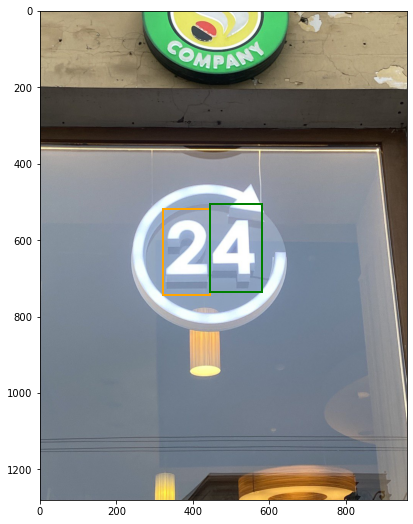

{'bboxes': tensor([[321.3468, 519.8942, 445.3906, 743.7860],
         [443.7553, 506.3951, 581.1427, 735.2381],
         [314.3427, 522.2251, 450.7961, 796.1154],
         [449.0233, 517.6366, 590.4615, 763.7515],
         [308.3313, 520.6531, 450.7087, 807.2040]]),
 'scores': tensor([0.7073, 0.5987, 0.1151, 0.0898, 0.0575])}

In [3]:
evaluate(
    path="data/3.jpeg",
    model=fasterrcnn,
    filter_threshold=0.5,
    iou_threshold=0.5,
    linewidth=2
)

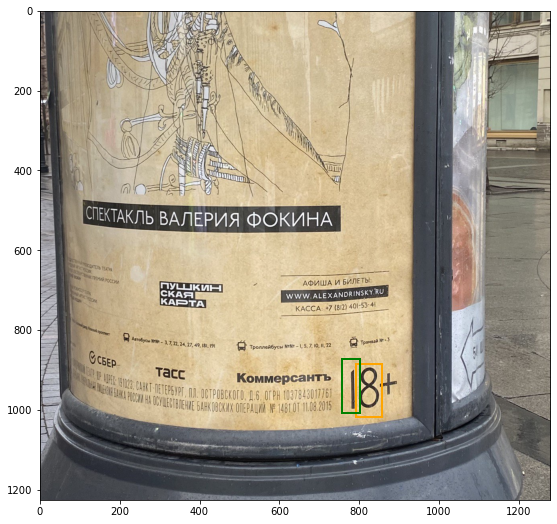

{'bboxes': tensor([[ 793.2728,  886.2798,  856.4068, 1019.1858],
         [ 794.7334,  881.8854,  860.6025, 1018.3804],
         [ 757.0052,  872.3217,  802.8181, 1007.7603],
         [ 749.7874,  809.4796,  809.5746, 1024.5188],
         [ 778.1261,  861.8316,  856.3665, 1022.3715],
         [ 825.8847,  890.1136,  902.0073,  992.9445],
         [ 783.4480,  839.5641,  866.9893, 1043.0027],
         [ 829.0040,  887.4164,  901.5009,  997.9680],
         [ 782.1979,  891.0510,  860.5405, 1012.5873],
         [ 784.2098,  826.8088,  864.6213, 1058.7207],
         [ 850.8533,  898.2036,  895.5835, 1010.8663]]),
 'scores': tensor([0.5463, 0.4156, 0.3912, 0.1763, 0.1760, 0.1691, 0.1229, 0.1218, 0.0925,
         0.0751, 0.0594])}

In [4]:
evaluate(
    path="data/4.jpeg",
    model=fasterrcnn,
    filter_threshold=0.3,
    iou_threshold=0.5,
    linewidth=2
)

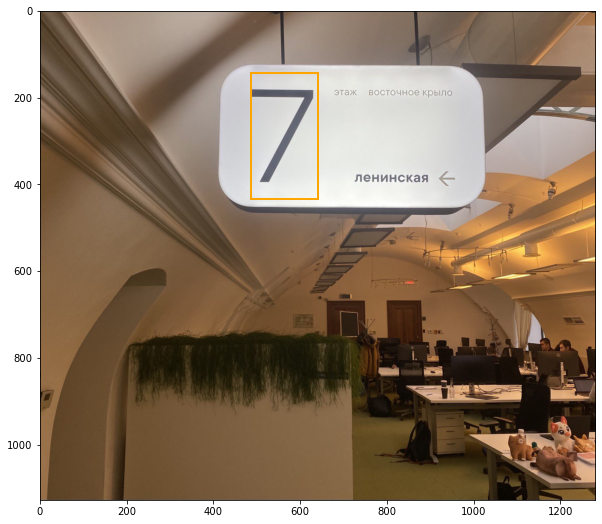

{'bboxes': tensor([[486.2200, 144.0329, 640.3148, 434.7115],
         [467.6816, 151.8835, 644.6896, 467.3428]]),
 'scores': tensor([0.5358, 0.2337])}

In [5]:
evaluate(
    path="data/6.jpeg",
    model=fasterrcnn,
    filter_threshold=0.5,
    iou_threshold=0.5,
    linewidth=2
)

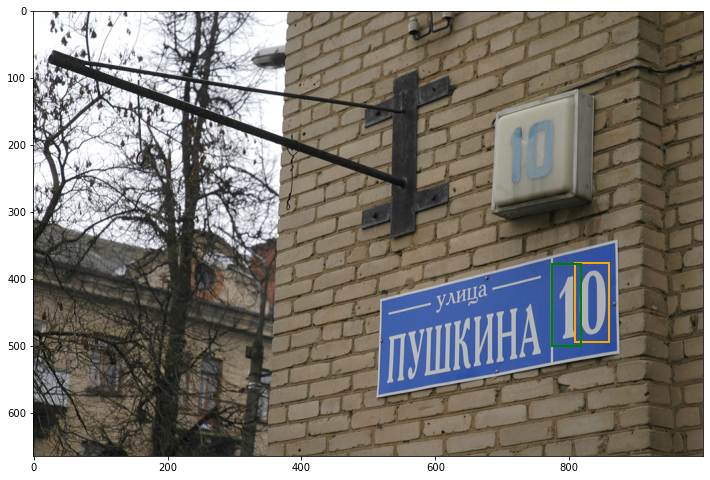

{'bboxes': tensor([[808.7071, 375.8839, 858.8932, 494.3782],
         [773.7399, 377.3163, 816.8669, 501.2459],
         [700.7123, 161.0747, 741.6520, 266.8584],
         [729.5419, 153.5308, 784.1533, 263.1667],
         [809.4806, 354.7155, 864.4882, 496.0267],
         [527.6443, 470.8410, 558.2479, 563.4683],
         [803.4221, 340.9125, 876.4752, 511.0631],
         [727.4449, 386.1521, 795.5034, 525.5643],
         [773.8636, 368.7384, 819.7964, 500.2209],
         [718.4459, 425.5950, 771.6682, 529.7838],
         [722.7830, 128.5658, 800.3375, 283.4666],
         [536.1242, 467.2556, 571.4016, 563.9926]]),
 'scores': tensor([0.9214, 0.7330, 0.3939, 0.2246, 0.2069, 0.1852, 0.1571, 0.0759, 0.0752,
         0.0693, 0.0634, 0.0571])}

In [6]:
evaluate(
    path="data/house_pushkina.jpg",
    model=fasterrcnn,
    filter_threshold=0.5,
    iou_threshold=0.5,
    linewidth=2
)